In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

city_data = city_data.drop_duplicates('city')

In [11]:
# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, on="city")
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [12]:
#find the average fare rate per city
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

average_fare = pyber_data.groupby("city")["fare"].mean()
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_drivers = pyber_data.groupby("city")["driver_count"].mean()
city_type = city_data.set_index('city')['type']


city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [13]:
pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

In [14]:
urban = pyber_cities[pyber_cities["City Type"]=="Urban"]
suburban = pyber_cities[pyber_cities["City Type"]=="Suburban"]
rural = pyber_cities[pyber_cities["City Type"]=="Rural"]

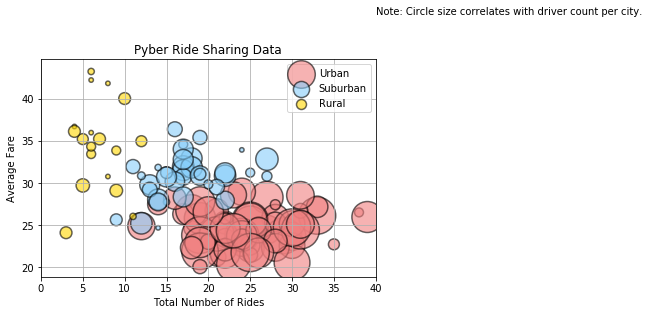

In [15]:
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], 
            color = "lightcoral", edgecolors="black", 
            s = urban["Number of Drivers"]*20, 
            label = "Urban", alpha = 0.6, linewidth = 1.5)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], 
            color = "lightskyblue", edgecolors ="black", 
            s = suburban["Number of Drivers"]*20, 
            label = "Suburban", alpha = 0.6, linewidth = 1.5)
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], 
            color = "gold", edgecolors = "black", 
            s = rural["Number of Drivers"]*20, 
            label = "Rural", alpha = 0.6, linewidth = 1.5)

#plt.title("Average Fare per City versus Number of Rides")
#plt.xlabel("Number of Rides")
# plt.ylabel("Average Fare Per City")
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
plt.legend(loc= "upper right")

# Incorporate a text label regarding circle size
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig

# Show plot
plt.show()

## Total Fares by City Type

<function matplotlib.pyplot.savefig(*args, **kwargs)>

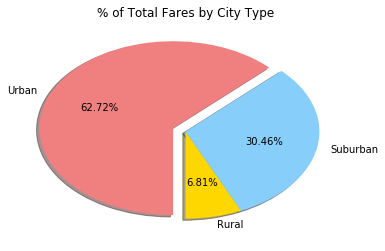

In [16]:
# Calculate Type Percents
city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()
city_fare_pie.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(city_fare_pie, labels = city_fare_pie.index, 
        autopct = "%1.2f%%", colors = colors, 
        explode = explode, shadow = True, startangle = 270)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig


## Total Rides by City Type

<function matplotlib.pyplot.savefig(*args, **kwargs)>

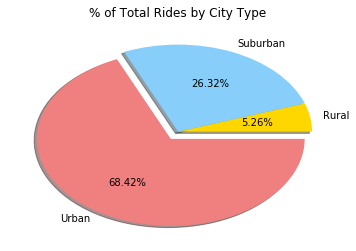

In [17]:
# Calculate Ride Percents
city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()
city_rides_pie.index

# Build Pie Chart
explode = (0,0,0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(city_rides_pie, labels = city_fare_pie.index, 
        autopct = "%1.2f%%", colors = colors, 
        explode = explode, shadow = True)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig

## Total Drivers by City Type

<function matplotlib.pyplot.savefig(*args, **kwargs)>

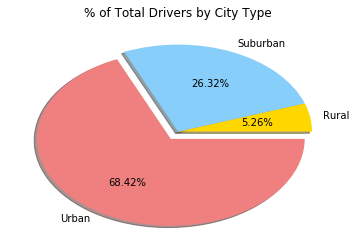

In [18]:
# Calculate Driver Percents
city_drivers_pie = pyber_data.groupby(["type"])["driver_count"].mean()
city_drivers_pie.index

# Build Pie Charts
explode = (0,0,0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(city_rides_pie, labels = city_fare_pie.index, 
        autopct = "%1.2f%%", colors = colors, 
        explode = explode, shadow = True)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig